In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Celebal Assignment/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


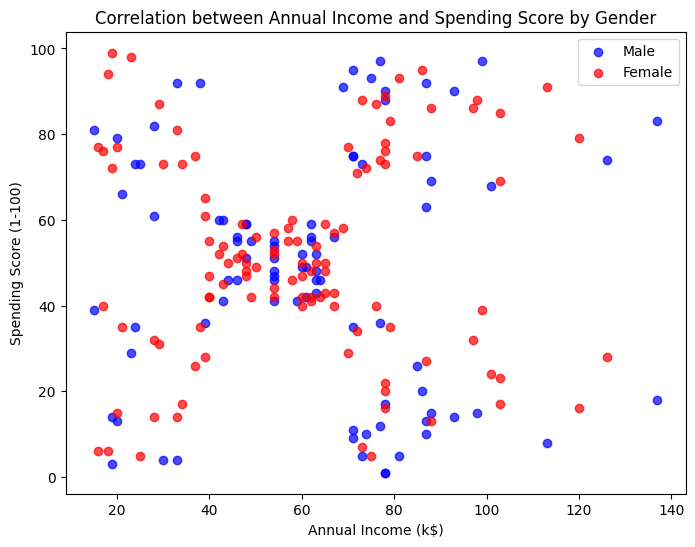

In [6]:


import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

colors = {'Male': 'blue', 'Female': 'red'}

for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'], label=gender, color=colors[gender], alpha=0.7)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Correlation between Annual Income and Spending Score by Gender')
_ = plt.legend()

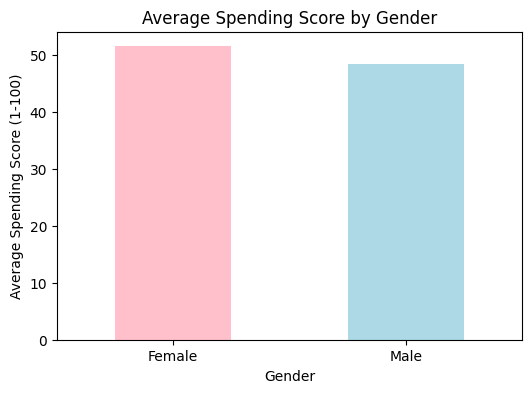

In [7]:


import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))

avg_spending_by_gender = df.groupby('Gender')['Spending Score (1-100)'].mean()
avg_spending_by_gender.plot(kind='bar', color=['pink', 'lightblue'])
plt.xlabel('Gender')
plt.ylabel('Average Spending Score (1-100)')
plt.title('Average Spending Score by Gender')
_ = plt.xticks(rotation=0)


In [8]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

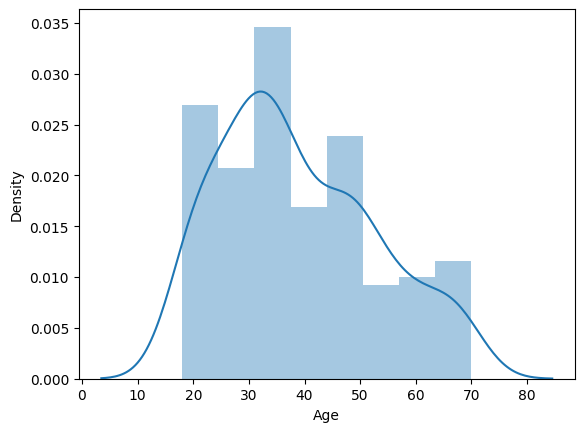

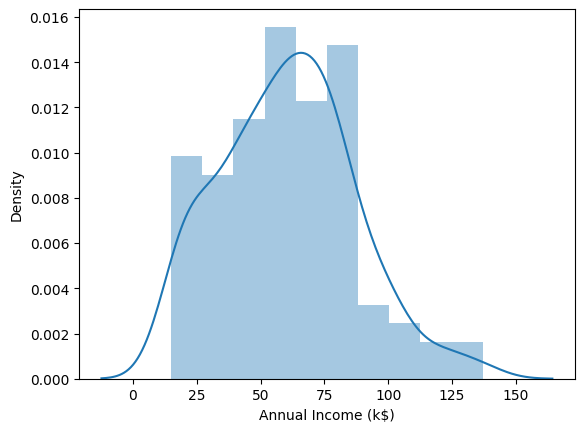

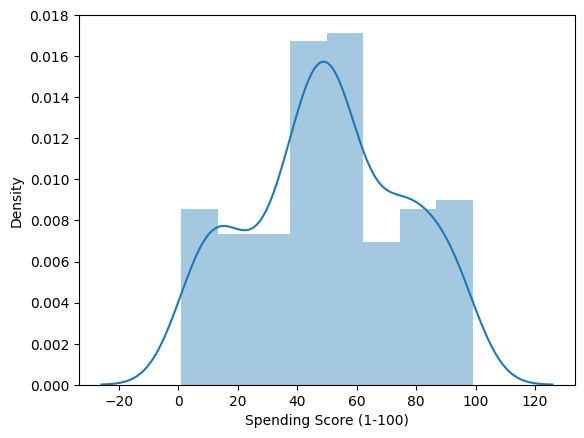

In [9]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

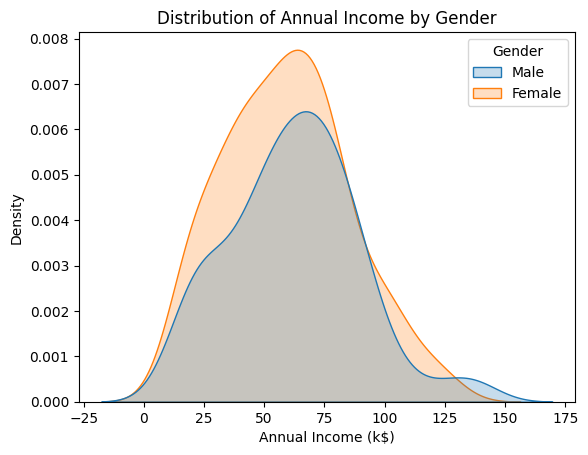

In [10]:
Df = pd.DataFrame({
    'Annual Income (k$)': df['Annual Income (k$)'],
    'Gender': df['Gender']
})

# Plotting using seaborn's kdeplot with hue
sns.kdeplot(data=Df, x='Annual Income (k$)', hue='Gender', shade=True)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.title('Distribution of Annual Income by Gender')
plt.show()


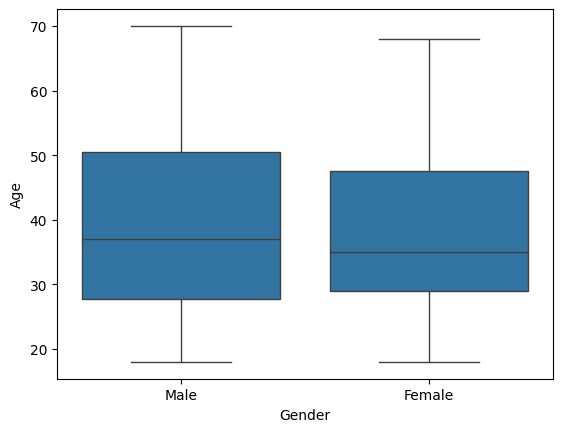

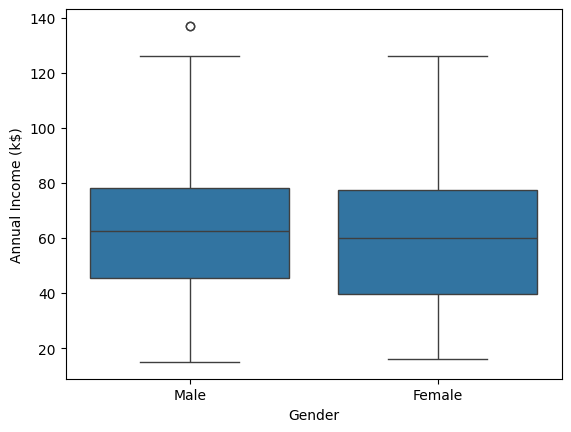

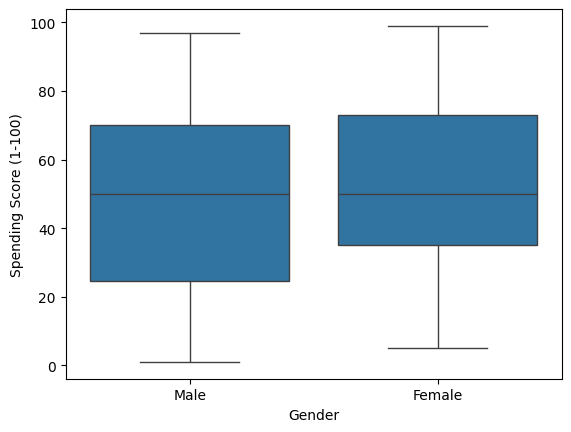

In [11]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

Bivariate Analysis

In [13]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

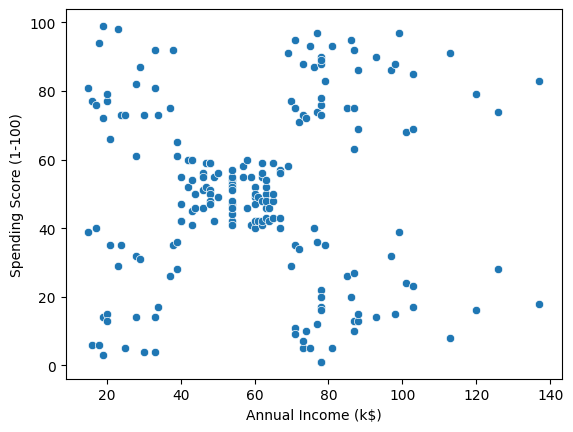

In [12]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

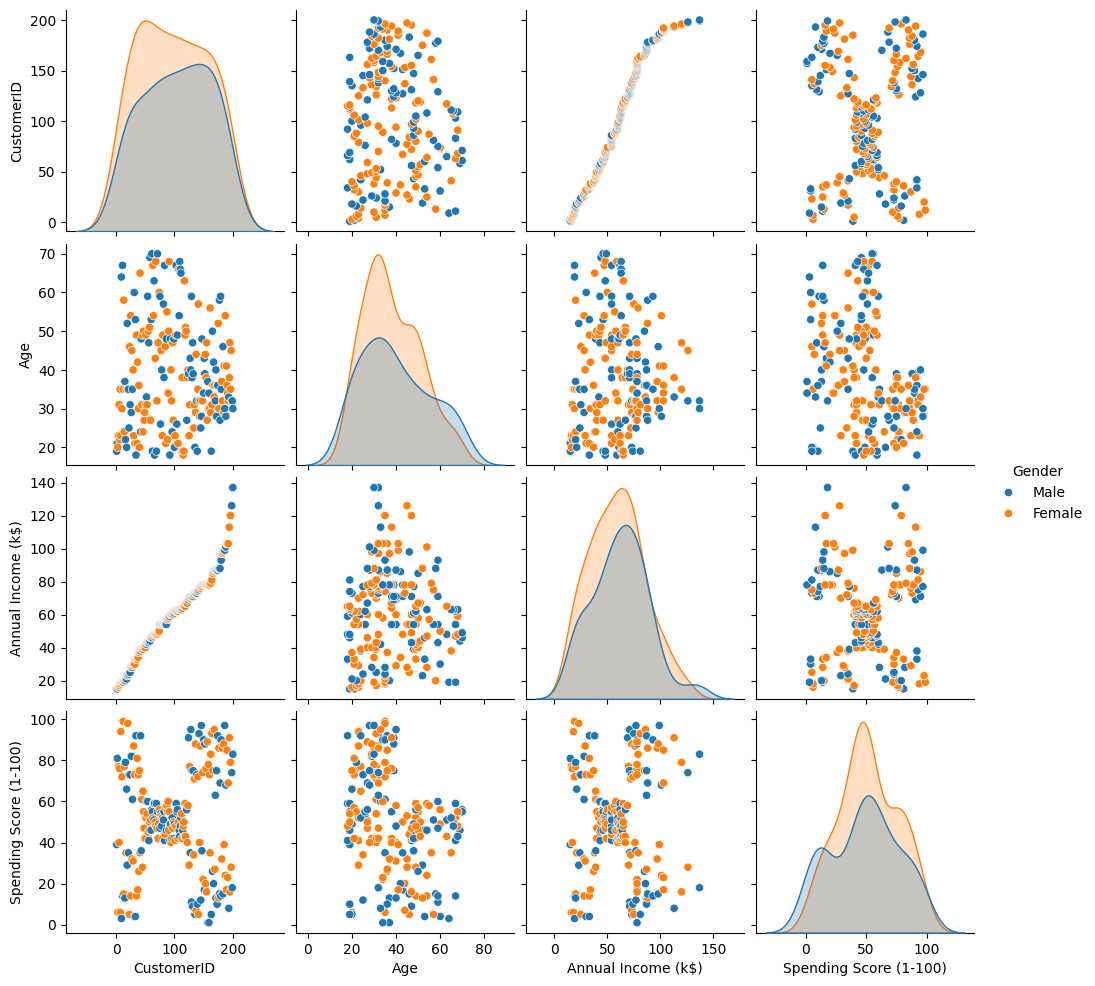

In [13]:
sns.pairplot(df,hue='Gender')

In [14]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [15]:
grouped_means = df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
grouped_means

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


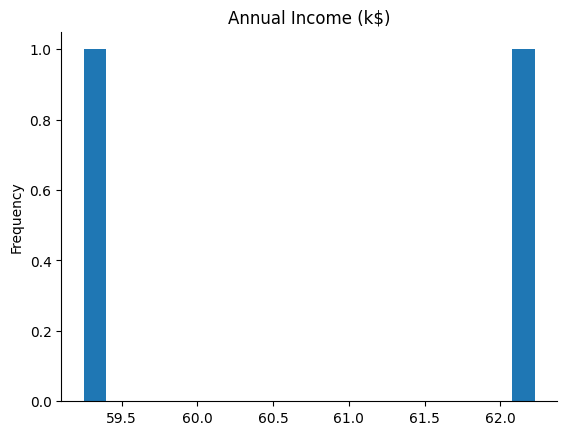

In [16]:
from matplotlib import pyplot as plt
grouped_means['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

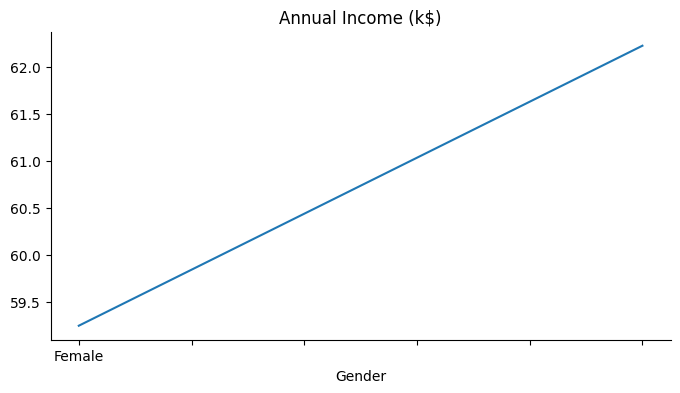

In [17]:
from matplotlib import pyplot as plt
grouped_means['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
print(df.dtypes)


CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object


In [20]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


In [21]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (k$)']])
KMeans(n_clusters=3)
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [22]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


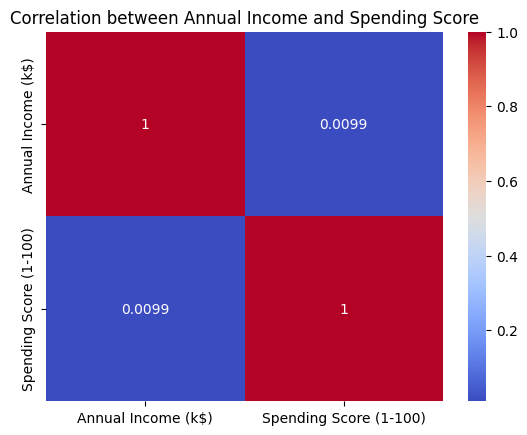

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df[['Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
_ = plt.title('Correlation between Annual Income and Spending Score')

In [25]:
clustering1.inertia_

23517.33093093093

<function matplotlib.pyplot.show(close=None, block=None)>

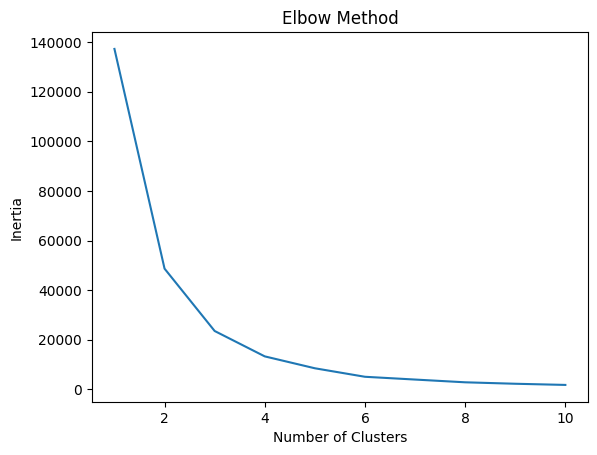

In [26]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)
plt.plot(range(1,11),intertia_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show

In [27]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [30]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


In [31]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,0,0
1,2,1,21,15,81,0,2
2,3,0,20,16,6,0,0
3,4,0,23,16,77,0,2
4,5,0,31,17,40,0,0


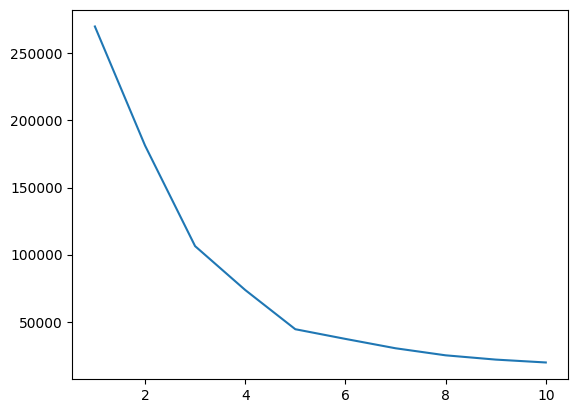

In [32]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

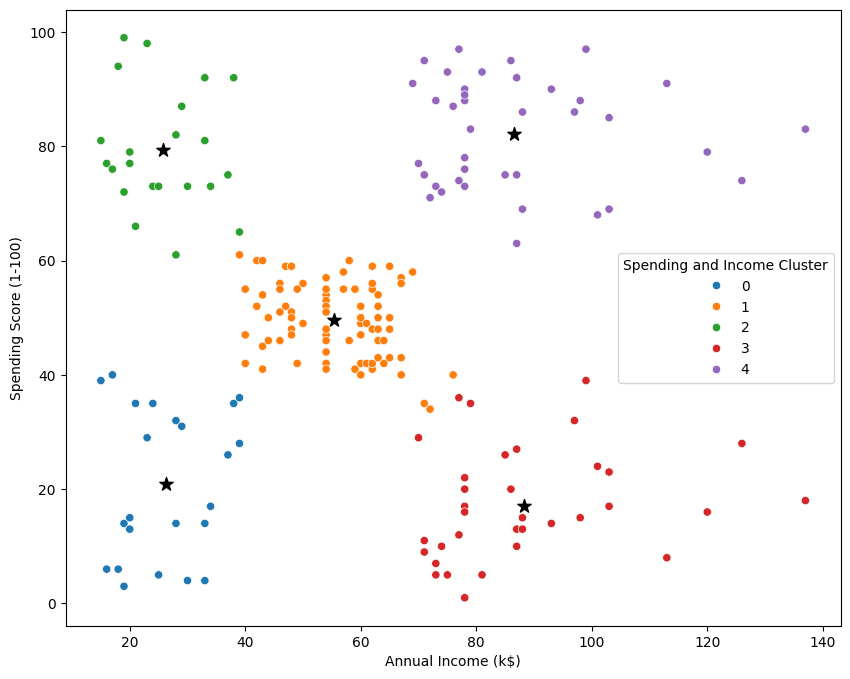

In [33]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.show()

In [34]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,0,1
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.592593,0.407407
2,0.590909,0.409091
3,0.457143,0.542857
4,0.538462,0.461538


In [35]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,42.716049,55.296296,49.518519
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,32.692308,86.538462,82.128205


In [36]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,0,0
1,2,1,21,15,81,0,2
2,3,0,20,16,6,0,0
3,4,0,23,16,77,0,2
4,5,0,31,17,40,0,0


In [37]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,0,0
1,2,1,21,15,81,0,2
2,3,0,20,16,6,0,0
3,4,0,23,16,77,0,2
4,5,0,31,17,40,0,0


In [38]:
dff.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster'],
      dtype='object')

In [43]:
dff = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]

# Add the Gender column: 1 for Male, 0 for Female
dff['Gender_Male'] = dff['Gender']

# Drop the Gender_Male column if it's no longer needed
dff.drop(columns=['Gender_Male'], inplace=True)
print(dff.head())

   Age  Annual Income (k$)  Spending Score (1-100)  Gender
0   19                  15                      39       1
1   21                  15                      81       1
2   20                  16                       6       0
3   23                  16                      77       0
4   31                  17                      40       0


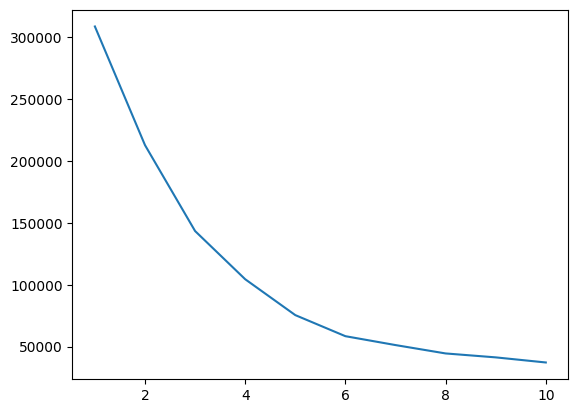

In [44]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [45]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,0,0
1,2,1,21,15,81,0,2
2,3,0,20,16,6,0,0
3,4,0,23,16,77,0,2
4,5,0,31,17,40,0,0
...,...,...,...,...,...,...,...
195,196,0,35,120,79,2,4
196,197,0,45,126,28,2,3
197,198,1,32,126,74,2,4
198,199,1,32,137,18,2,3


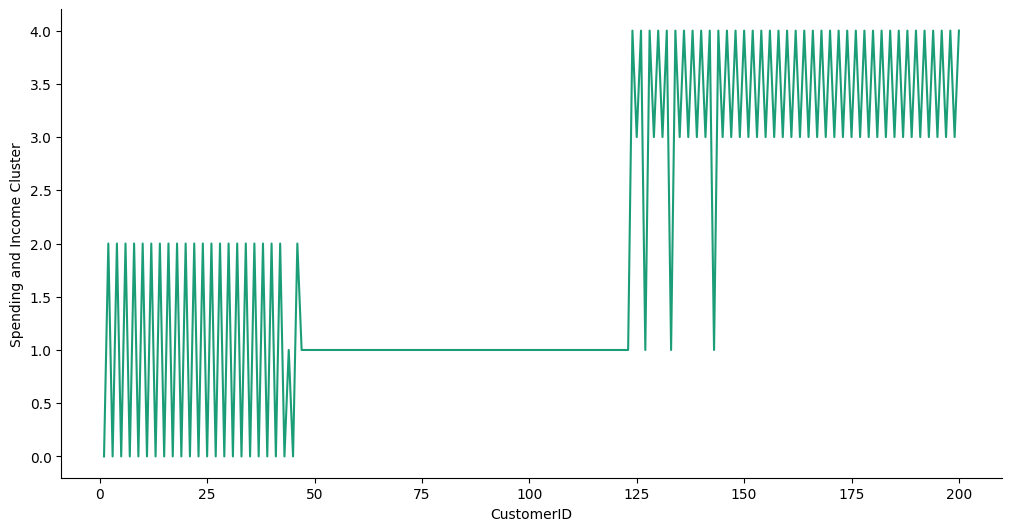

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Spending and Income Cluster']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Spending and Income Cluster')